In [ ]:
#convert to angles for dataset 3
import pandas as pd
import numpy as np
from nptdms import TdmsFile
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import matplotlib.pyplot as plt
# Step 1: Load the .tdms file
file_path = "./Data/basic_datasets/data_3.tdms"
tdms_file = TdmsFile.read(file_path)


In [ ]:
#Convert into angles 
df_tdms = tdms_file.as_dataframe()
print("TDMS File Data Loaded:")
print(df_tdms.head())  # Display the first few rows to verify the data structure
df_tdms_every_500 = df_tdms.iloc[::2000]
# Step 2: Define the features and target columns
s1_col, s2_col, s3_col = "/'Analog'/'AI3'", "/'Analog'/'AI4'", "/'Analog'/'AI5'"  # Feature columns
t1_col, t2_col, t3_col = "/'Analog'/'AI0'", "/'Analog'/'AI1'", "/'Analog'/'AI2'"  # Target columns
# Step 3: Function to calculate angles
def calculate_angles(s1, s2, s3):
    """Calculate azimuthal (phi) and polar (theta) angles."""
    phi = np.arctan2(s2, s1) * 180 / np.pi  # Azimuthal angle (phi) in degrees
    magnitude = np.sqrt(s1**2 + s2**2 + s3**2)
    theta = np.arccos(s3 / magnitude) * 180 / np.pi  # Polar angle (theta) in degrees
    return phi, theta


# Step 4: Calculate angles for features and targets with progress logging
print("Starting feature angle calculations...")

# Counter for progress tracking
row_counter = [0]  # Using a mutable object to update the count inside the lambda function

def track_progress(row, counter):
    """Wrapper for calculate_angles to track progress."""
    counter[0] += 1
    if counter[0] % 1000000 == 0:
        print(f"Processed {counter[0]} rows...")
    return calculate_angles(row[s1_col], row[s2_col], row[s3_col])
feature_angles = df_tdms_every_500[[s1_col, s2_col, s3_col]].apply(
    lambda row: track_progress(row, row_counter), axis=1
)
print("Feature angle calculations completed.")
print("Starting target angle calculations...")
target_angles = df_tdms_every_500[[t1_col, t2_col, t3_col]].apply(
    lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1
)
# Step 5: Create a new DataFrame with calculated angles
print("Creating DataFrame with calculated angles...")
df_angles = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})
print("New DataFrame created.")
# Step 6: Initialize the "reference" and "details" columns
df_angles["reference"] = 0

# Optional: Save to a CSV file
output_path = "./Data/data_angles/data3_angles.csv"
df_angles.to_csv(output_path, index=False)



print(f"Processed data saved to {output_path}")

TDMS File Data Loaded:
   /'Analog'/'AI0'  /'Analog'/'AI1'  /'Analog'/'AI2'  /'Analog'/'AI3'  \
0         2.483517         1.418804         0.100122         2.444445   
1         2.473749         1.418804         0.109890         2.444445   
2         2.483517         1.418804         0.090354         2.444445   
3         2.483517         1.418804         0.061050         2.444445   
4         2.483517         1.418804         0.109890         2.444445   

   /'Analog'/'AI4'  /'Analog'/'AI5'  
0         0.031746        -0.124542  
1         0.041514        -0.095238  
2         0.051282        -0.095238  
3         0.041514        -0.095238  
4         0.051282        -0.095238  
Starting feature angle calculations...
Feature angle calculations completed.
Starting target angle calculations...
Creating DataFrame with calculated angles...
New DataFrame created.
Processed data saved to ../Data/data_angles/data3_angles.csv


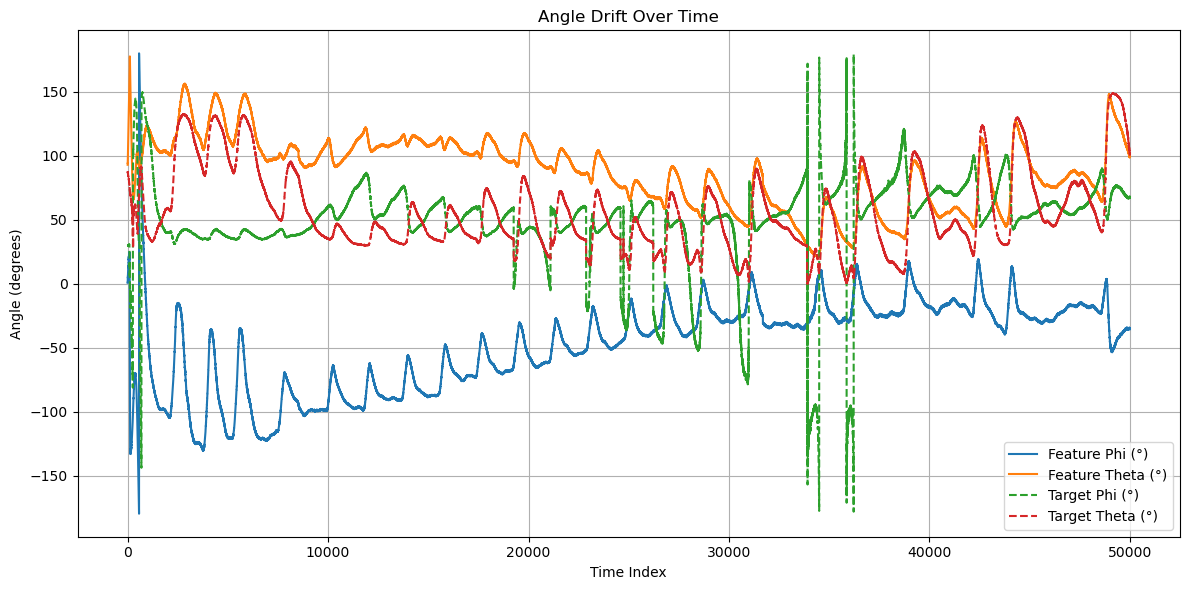

In [10]:
# Time axis based on row index
time = df_angles.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#convert dataset 2 to angles
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, random_split
# Load the dataset
data_dir = "./Data/basic_datasets/data_2.csv"
df = pd.read_csv(data_dir).iloc[::1000]

# Define the features (s1, s2, s3) and targets (t1, t2, t3)
s1_col, s2_col, s3_col = "AI3", "AI4", "AI5"
t1_col, t2_col, t3_col = "AI0", "AI1", "AI2"

# Calculate angles for features
feature_angles = df[[s1_col, s2_col, s3_col]].apply(lambda row: calculate_angles(row[s1_col], row[s2_col], row[s3_col]), axis=1)

# Calculate angles for targets
target_angles = df[[t1_col, t2_col, t3_col]].apply(lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1)

# Create a new DataFrame with only the calculated angles
df_angles_test = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})
# Initialize the "reference" and "details" columns
df_angles_test["reference"] = 0

# Optional: Save to a CSV file
output_path = "./Data/data_angles/data2_angles.csv"
df_angles_test.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to ../Data/data_angles/data2_angles.csv


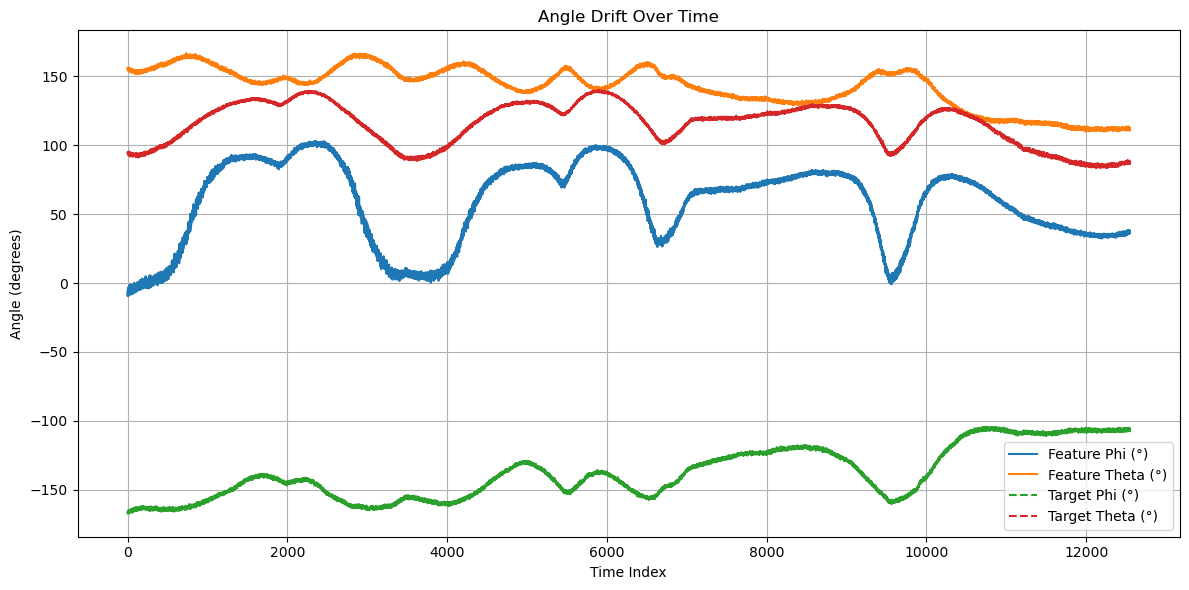

In [12]:

# Time axis based on row index
time = df_angles_test.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles_test["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles_test["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles_test["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles_test["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#convert dataset 1 to angles
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, random_split
# Load the dataset
data_dir = "./Data/basic_datasets/data_1.csv"


In [ ]:

df = pd.read_csv(data_dir).iloc[::100]

# Define the features (s1, s2, s3) and targets (t1, t2, t3)
s1_col, s2_col, s3_col = "AI3", "AI4", "AI5"
t1_col, t2_col, t3_col = "AI0", "AI1", "AI2"

# Calculate angles for features
feature_angles = df[[s1_col, s2_col, s3_col]].apply(lambda row: calculate_angles(row[s1_col], row[s2_col], row[s3_col]), axis=1)

# Calculate angles for targets
target_angles = df[[t1_col, t2_col, t3_col]].apply(lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1)

# Create a new DataFrame with only the calculated angles
df_angles_test = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})
# Initialize the "reference" and "details" columns
df_angles_test["reference"] = 0

# Optional: Save to a CSV file
output_path = "./Data/data_angles/data1_angles.csv"
df_angles_test.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to ../Data/data_angles/data1_angles.csv


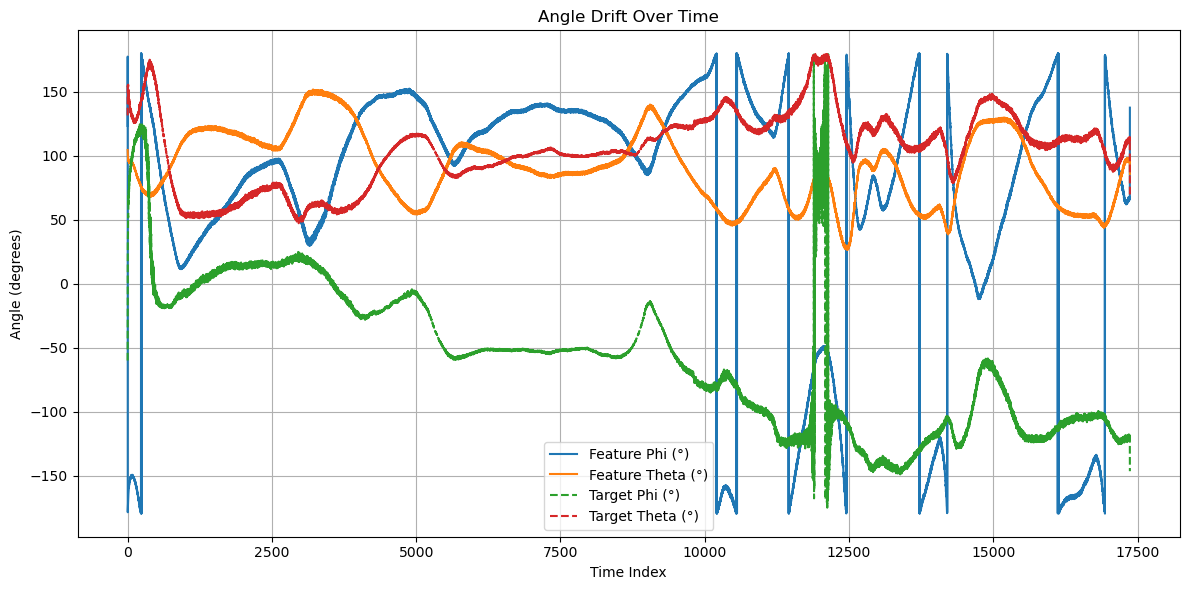

In [15]:

# Time axis based on row index
time = df_angles_test.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles_test["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles_test["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles_test["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles_test["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processed data saved to ./data_angles/data6_angles.csv


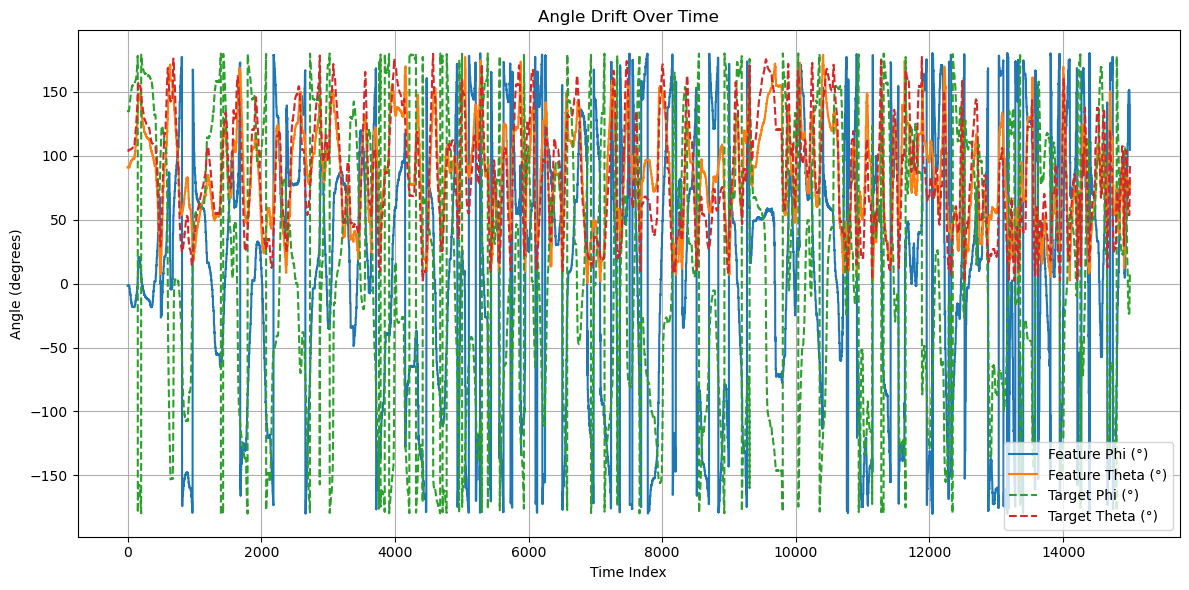

In [10]:
# Import libraries only once
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import matplotlib.pyplot as plt
import scipy.io

def calculate_angles(s1, s2, s3):
    """Calculate azimuthal (phi) and polar (theta) angles."""
    phi = np.arctan2(s2, s1) * 180 / np.pi  # Azimuthal angle (phi) in degrees
    magnitude = np.sqrt(s1**2 + s2**2 + s3**2)
    theta = np.arccos(s3 / magnitude) * 180 / np.pi  # Polar angle (theta) in degrees
    return phi, theta

# Load the data from .mat file
data_path = "./basic_datasets/data_6.mat"
mat = scipy.io.loadmat(data_path)

# Extract S-parameter traces
s1_txp = mat['s1_txp'].flatten()
s2_txp = mat['s2_txp'].flatten()
s3_txp = mat['s3_txp'].flatten()
s1_pax = mat['s1_pax'].flatten()
s2_pax = mat['s2_pax'].flatten()
s3_pax = mat['s3_pax'].flatten()

# Create a DataFrame from the .mat data instead of reading a CSV
# Use txp as features and pax as targets (assuming this is the intended structure)
df = pd.DataFrame({
    "AI3": s1_txp,
    "AI4": s2_txp,
    "AI5": s3_txp,
    "AI0": s1_pax,
    "AI1": s2_pax,
    "AI2": s3_pax
})


# Define the features (s1, s2, s3) and targets (t1, t2, t3)
s1_col, s2_col, s3_col = "AI3", "AI4", "AI5"
t1_col, t2_col, t3_col = "AI0", "AI1", "AI2"

# Calculate angles for features
feature_angles = df[[s1_col, s2_col, s3_col]].apply(lambda row: calculate_angles(row[s1_col], row[s2_col], row[s3_col]), axis=1)

# Calculate angles for targets
target_angles = df[[t1_col, t2_col, t3_col]].apply(lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1)

# Create a new DataFrame with only the calculated angles
df_angles_test = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})

# Initialize the "reference" column
df_angles_test["reference"] = 0

# Create output directory if it doesn't exist
# Save to a CSV file
output_path = "./data_angles/data6_angles.csv"
df_angles_test.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

# Time axis based on row index
time = df_angles_test.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles_test["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles_test["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles_test["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles_test["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

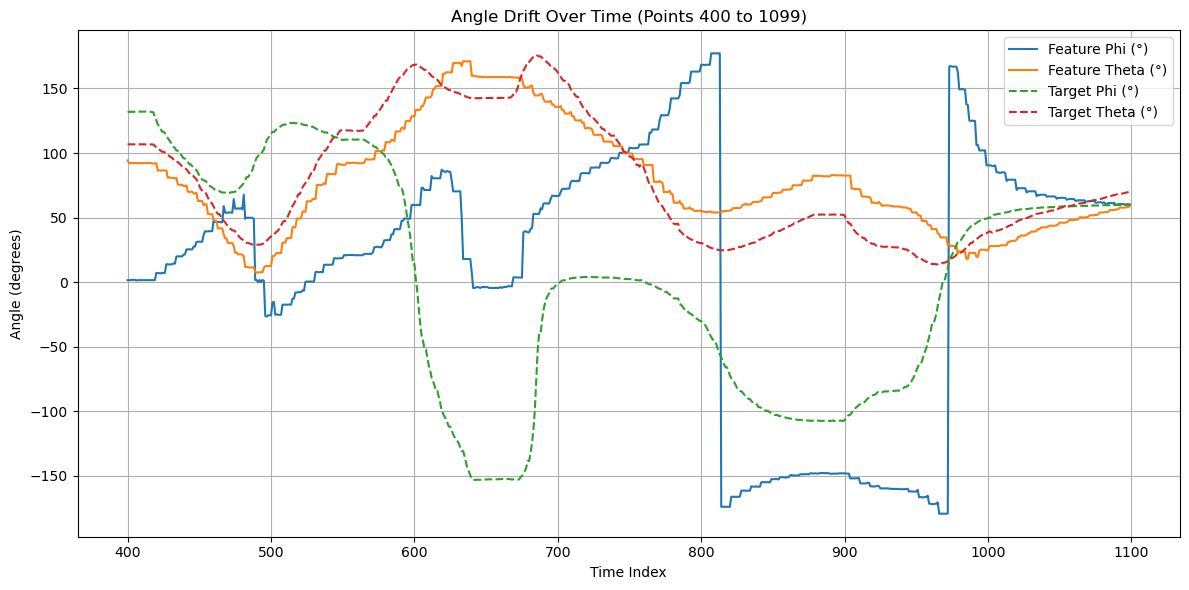

In [11]:
# Add this code at the end of your script, after your existing plot

# Create a second plot focusing on a small section
plt.figure(figsize=(12, 6))

# Define the section to zoom in on
start_idx = 400  # Starting index
section_size = 700  # Number of points to display

# Calculate end index, making sure we don't go out of bounds
end_idx = min(start_idx + section_size, len(time))

# Create the zoomed plot
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Phi (degrees)"][start_idx:end_idx], label="Feature Phi (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Theta (degrees)"][start_idx:end_idx], label="Feature Theta (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Target Phi (degrees)"][start_idx:end_idx], label="Target Phi (°)", linestyle='--')
plt.plot(time[start_idx:end_idx], df_angles_test["Target Theta (degrees)"][start_idx:end_idx], label="Target Theta (°)", linestyle='--')

plt.title(f"Angle Drift Over Time (Points {start_idx} to {end_idx-1})")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processed data saved to ./data_angles/data8_angles.csv


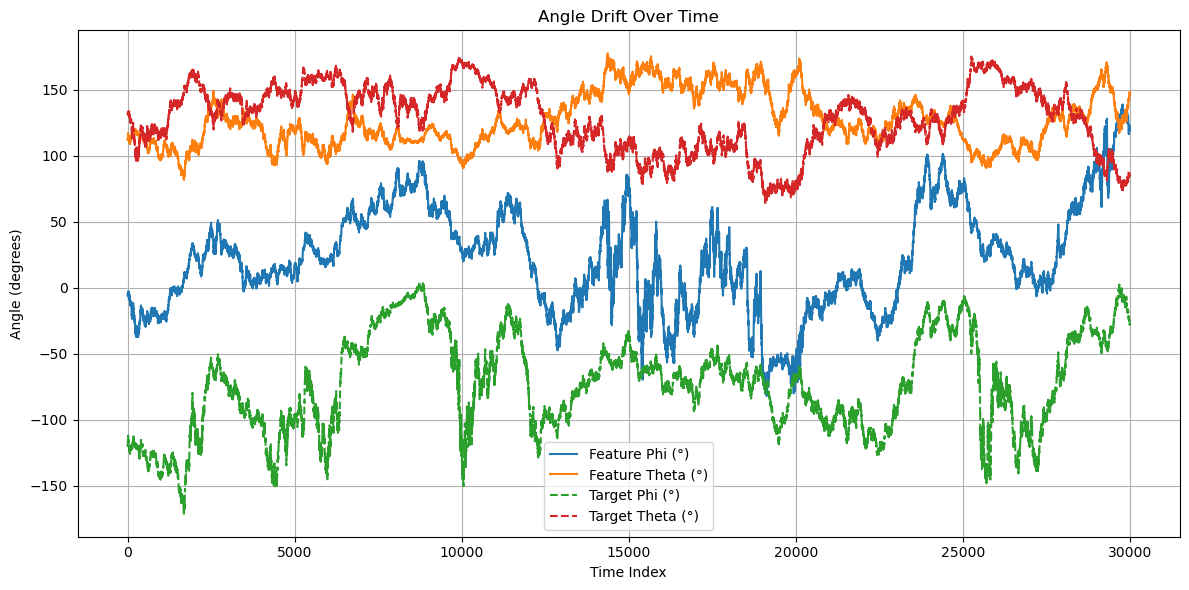

In [1]:
# Import libraries only once
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import matplotlib.pyplot as plt
import scipy.io

def calculate_angles(s1, s2, s3):
    """Calculate azimuthal (phi) and polar (theta) angles."""
    phi = np.arctan2(s2, s1) * 180 / np.pi  # Azimuthal angle (phi) in degrees
    magnitude = np.sqrt(s1**2 + s2**2 + s3**2)
    theta = np.arccos(s3 / magnitude) * 180 / np.pi  # Polar angle (theta) in degrees
    return phi, theta

# Load the data from .mat file
data_path = "./basic_datasets/data_8.mat"
mat = scipy.io.loadmat(data_path)

# Extract S-parameter traces
s1_txp = mat['s1_txp'].flatten()
s2_txp = mat['s2_txp'].flatten()
s3_txp = mat['s3_txp'].flatten()
s1_pax = mat['s1_pax'].flatten()
s2_pax = mat['s2_pax'].flatten()
s3_pax = mat['s3_pax'].flatten()

# Create a DataFrame from the .mat data instead of reading a CSV
# Use txp as features and pax as targets (assuming this is the intended structure)
df = pd.DataFrame({
    "AI3": s1_txp,
    "AI4": s2_txp,
    "AI5": s3_txp,
    "AI0": s1_pax,
    "AI1": s2_pax,
    "AI2": s3_pax
})


# Define the features (s1, s2, s3) and targets (t1, t2, t3)
s1_col, s2_col, s3_col = "AI3", "AI4", "AI5"
t1_col, t2_col, t3_col = "AI0", "AI1", "AI2"

# Calculate angles for features
feature_angles = df[[s1_col, s2_col, s3_col]].apply(lambda row: calculate_angles(row[s1_col], row[s2_col], row[s3_col]), axis=1)

# Calculate angles for targets
target_angles = df[[t1_col, t2_col, t3_col]].apply(lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1)

# Create a new DataFrame with only the calculated angles
df_angles_test = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})

# Initialize the "reference" column
df_angles_test["reference"] = 0

# Create output directory if it doesn't exist
# Save to a CSV file
output_path = "./data_angles/data8_angles.csv"
df_angles_test.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

# Time axis based on row index
time = df_angles_test.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles_test["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles_test["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles_test["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles_test["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

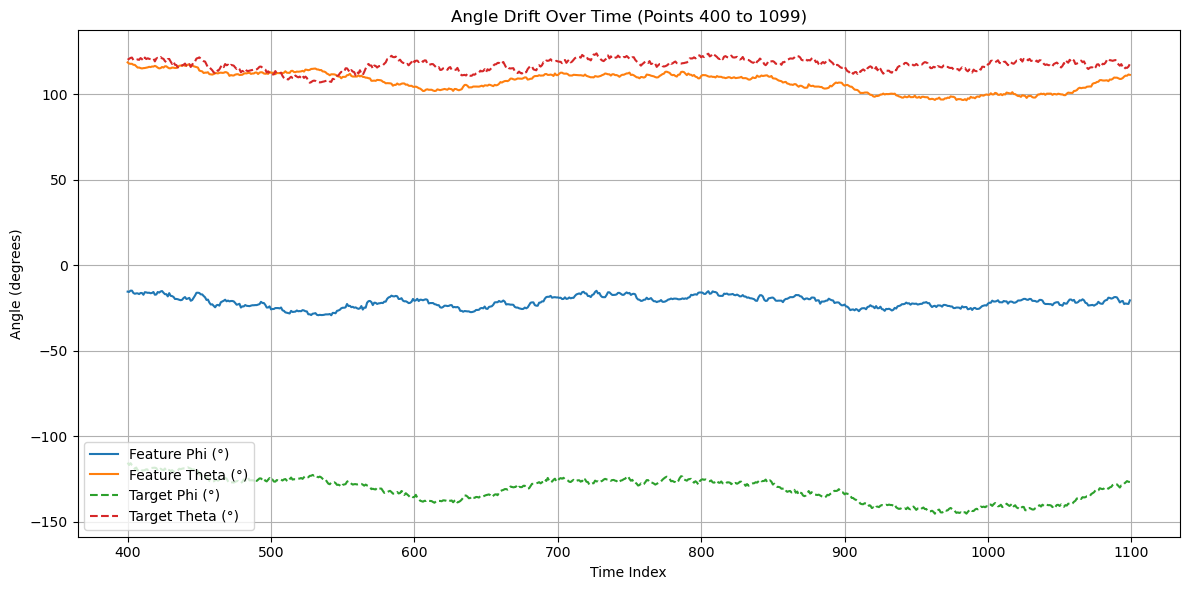

In [2]:
# Add this code at the end of your script, after your existing plot

# Create a second plot focusing on a small section
plt.figure(figsize=(12, 6))

# Define the section to zoom in on
start_idx = 400  # Starting index
section_size = 700  # Number of points to display

# Calculate end index, making sure we don't go out of bounds
end_idx = min(start_idx + section_size, len(time))

# Create the zoomed plot
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Phi (degrees)"][start_idx:end_idx], label="Feature Phi (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Theta (degrees)"][start_idx:end_idx], label="Feature Theta (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Target Phi (degrees)"][start_idx:end_idx], label="Target Phi (°)", linestyle='--')
plt.plot(time[start_idx:end_idx], df_angles_test["Target Theta (degrees)"][start_idx:end_idx], label="Target Theta (°)", linestyle='--')

plt.title(f"Angle Drift Over Time (Points {start_idx} to {end_idx-1})")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processed data saved to ./data_angles/txp_1560_pax_1536_angles.csv


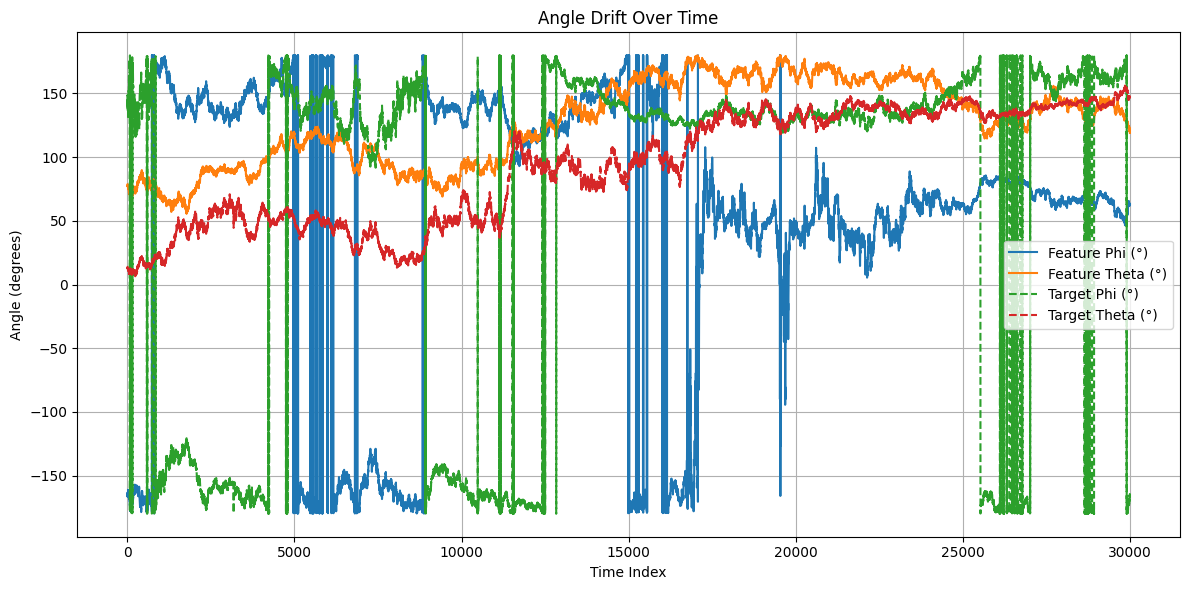

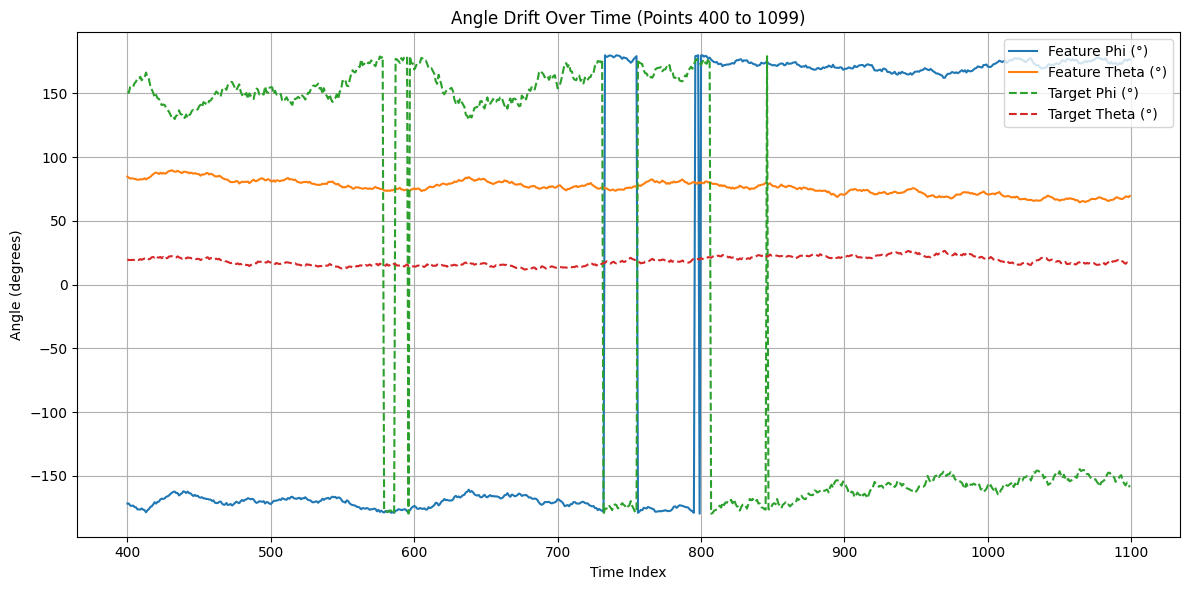

In [1]:
# Import libraries only once
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import matplotlib.pyplot as plt
import scipy.io

def calculate_angles(s1, s2, s3):
    """Calculate azimuthal (phi) and polar (theta) angles."""
    phi = np.arctan2(s2, s1) * 180 / np.pi  # Azimuthal angle (phi) in degrees
    magnitude = np.sqrt(s1**2 + s2**2 + s3**2)
    theta = np.arccos(s3 / magnitude) * 180 / np.pi  # Polar angle (theta) in degrees
    return phi, theta

# Load the data from .mat file
data_path = "./basic_datasets/04_07_202530k_samples_txp_1560_pax_1536_polcon_1Hz.mat"
mat = scipy.io.loadmat(data_path)

# Extract S-parameter traces
s1_txp = mat['s1_txp'].flatten()
s2_txp = mat['s2_txp'].flatten()
s3_txp = mat['s3_txp'].flatten()
s1_pax = mat['s1_pax'].flatten()
s2_pax = mat['s2_pax'].flatten()
s3_pax = mat['s3_pax'].flatten()

# Create a DataFrame from the .mat data instead of reading a CSV
# Use txp as features and pax as targets (assuming this is the intended structure)
df = pd.DataFrame({
    "AI3": s1_txp,
    "AI4": s2_txp,
    "AI5": s3_txp,
    "AI0": s1_pax,
    "AI1": s2_pax,
    "AI2": s3_pax
})


# Define the features (s1, s2, s3) and targets (t1, t2, t3)
s1_col, s2_col, s3_col = "AI3", "AI4", "AI5"
t1_col, t2_col, t3_col = "AI0", "AI1", "AI2"

# Calculate angles for features
feature_angles = df[[s1_col, s2_col, s3_col]].apply(lambda row: calculate_angles(row[s1_col], row[s2_col], row[s3_col]), axis=1)

# Calculate angles for targets
target_angles = df[[t1_col, t2_col, t3_col]].apply(lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1)

# Create a new DataFrame with only the calculated angles
df_angles_test = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})

# Initialize the "reference" column
df_angles_test["reference"] = 0

# Create output directory if it doesn't exist
# Save to a CSV file
output_path = "./data_angles/txp_1560_pax_1536_angles.csv"
df_angles_test.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

# Time axis based on row index
time = df_angles_test.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles_test["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles_test["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles_test["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles_test["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a second plot focusing on a small section
plt.figure(figsize=(12, 6))

# Define the section to zoom in on
start_idx = 400  # Starting index
section_size = 700  # Number of points to display

# Calculate end index, making sure we don't go out of bounds
end_idx = min(start_idx + section_size, len(time))

# Create the zoomed plot
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Phi (degrees)"][start_idx:end_idx], label="Feature Phi (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Theta (degrees)"][start_idx:end_idx], label="Feature Theta (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Target Phi (degrees)"][start_idx:end_idx], label="Target Phi (°)", linestyle='--')
plt.plot(time[start_idx:end_idx], df_angles_test["Target Theta (degrees)"][start_idx:end_idx], label="Target Theta (°)", linestyle='--')

plt.title(f"Angle Drift Over Time (Points {start_idx} to {end_idx-1})")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processed data saved to ./data_angles/txp_1551.5_pax_1552.5_polcon_and_fiber.csv


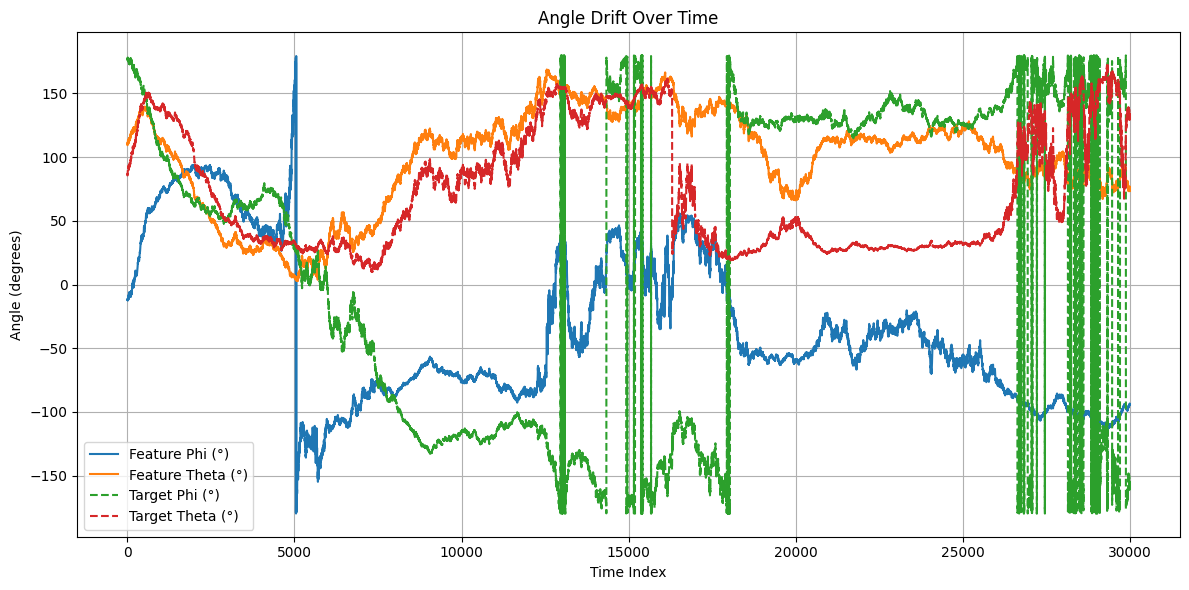

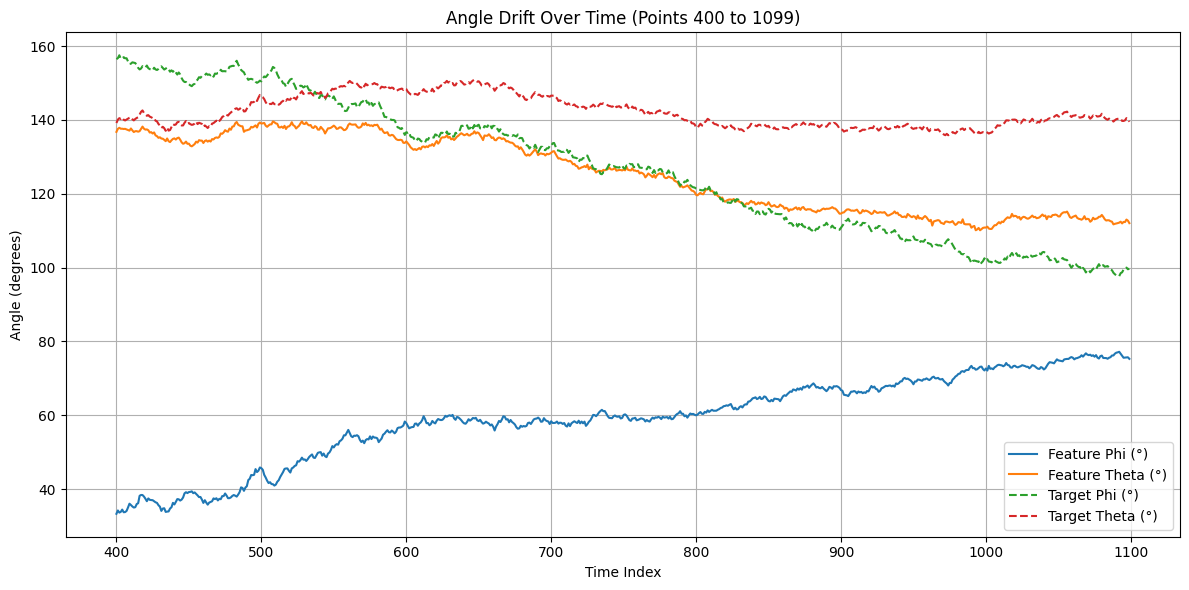

In [2]:
# Import libraries only once
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import matplotlib.pyplot as plt
import scipy.io

def calculate_angles(s1, s2, s3):
    """Calculate azimuthal (phi) and polar (theta) angles."""
    phi = np.arctan2(s2, s1) * 180 / np.pi  # Azimuthal angle (phi) in degrees
    magnitude = np.sqrt(s1**2 + s2**2 + s3**2)
    theta = np.arccos(s3 / magnitude) * 180 / np.pi  # Polar angle (theta) in degrees
    return phi, theta

# Load the data from .mat file
data_path = "./basic_datasets/04_07_202530k_samples_txp_1551.5_pax_1552.5_polcon_and_fiber_1Hz.mat"
mat = scipy.io.loadmat(data_path)

# Extract S-parameter traces
s1_txp = mat['s1_txp'].flatten()
s2_txp = mat['s2_txp'].flatten()
s3_txp = mat['s3_txp'].flatten()
s1_pax = mat['s1_pax'].flatten()
s2_pax = mat['s2_pax'].flatten()
s3_pax = mat['s3_pax'].flatten()

# Create a DataFrame from the .mat data instead of reading a CSV
# Use txp as features and pax as targets (assuming this is the intended structure)
df = pd.DataFrame({
    "AI3": s1_txp,
    "AI4": s2_txp,
    "AI5": s3_txp,
    "AI0": s1_pax,
    "AI1": s2_pax,
    "AI2": s3_pax
})


# Define the features (s1, s2, s3) and targets (t1, t2, t3)
s1_col, s2_col, s3_col = "AI3", "AI4", "AI5"
t1_col, t2_col, t3_col = "AI0", "AI1", "AI2"

# Calculate angles for features
feature_angles = df[[s1_col, s2_col, s3_col]].apply(lambda row: calculate_angles(row[s1_col], row[s2_col], row[s3_col]), axis=1)

# Calculate angles for targets
target_angles = df[[t1_col, t2_col, t3_col]].apply(lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1)

# Create a new DataFrame with only the calculated angles
df_angles_test = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})

# Initialize the "reference" column
df_angles_test["reference"] = 0

# Create output directory if it doesn't exist
# Save to a CSV file
output_path = "./data_angles/txp_1551.5_pax_1552.5_polcon_and_fiber.csv"
df_angles_test.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

# Time axis based on row index
time = df_angles_test.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles_test["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles_test["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles_test["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles_test["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a second plot focusing on a small section
plt.figure(figsize=(12, 6))

# Define the section to zoom in on
start_idx = 400  # Starting index
section_size = 700  # Number of points to display

# Calculate end index, making sure we don't go out of bounds
end_idx = min(start_idx + section_size, len(time))

# Create the zoomed plot
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Phi (degrees)"][start_idx:end_idx], label="Feature Phi (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Theta (degrees)"][start_idx:end_idx], label="Feature Theta (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Target Phi (degrees)"][start_idx:end_idx], label="Target Phi (°)", linestyle='--')
plt.plot(time[start_idx:end_idx], df_angles_test["Target Theta (degrees)"][start_idx:end_idx], label="Target Theta (°)", linestyle='--')

plt.title(f"Angle Drift Over Time (Points {start_idx} to {end_idx-1})")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processed data saved to ./data_angles/100ktxp_1551_pax_1552_angles_fast.csv


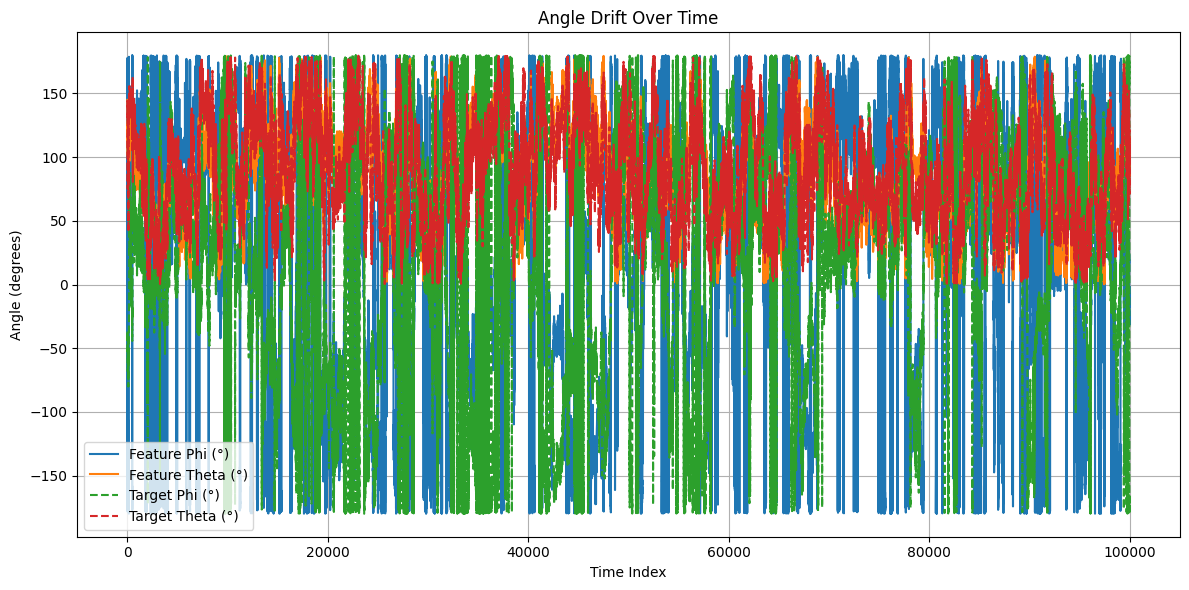

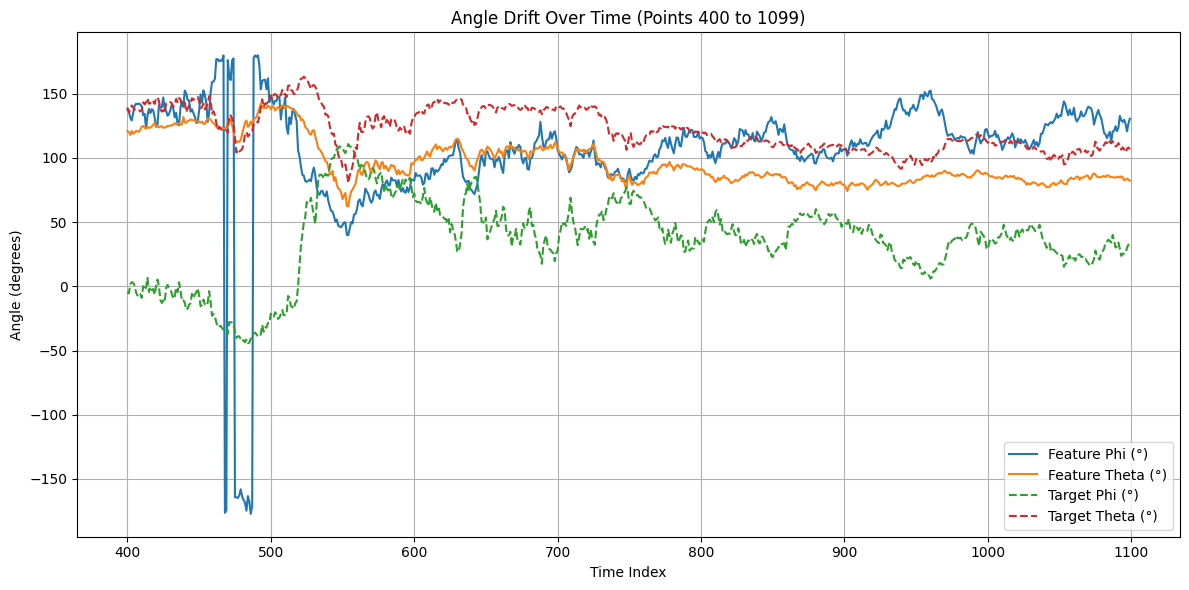

In [5]:
# Import libraries only once
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import matplotlib.pyplot as plt
import scipy.io

def calculate_angles(s1, s2, s3):
    """Calculate azimuthal (phi) and polar (theta) angles."""
    phi = np.arctan2(s2, s1) * 180 / np.pi  # Azimuthal angle (phi) in degrees
    magnitude = np.sqrt(s1**2 + s2**2 + s3**2)
    theta = np.arccos(s3 / magnitude) * 180 / np.pi  # Polar angle (theta) in degrees
    return phi, theta

# Load the data from .mat file
data_path = "./basic_datasets/07_19_2025100k_samples_txp_1551.5_pax_1552.5_polcon_and_fiber_1Hz.mat"
mat = scipy.io.loadmat(data_path)

# Extract S-parameter traces
s1_txp = mat['s1_txp'].flatten()
s2_txp = mat['s2_txp'].flatten()
s3_txp = mat['s3_txp'].flatten()
s1_pax = mat['s1_pax'].flatten()
s2_pax = mat['s2_pax'].flatten()
s3_pax = mat['s3_pax'].flatten()

# Create a DataFrame from the .mat data instead of reading a CSV
# Use txp as features and pax as targets (assuming this is the intended structure)
df = pd.DataFrame({
    "AI3": s1_txp,
    "AI4": s2_txp,
    "AI5": s3_txp,
    "AI0": s1_pax,
    "AI1": s2_pax,
    "AI2": s3_pax
})


# Define the features (s1, s2, s3) and targets (t1, t2, t3)
s1_col, s2_col, s3_col = "AI3", "AI4", "AI5"
t1_col, t2_col, t3_col = "AI0", "AI1", "AI2"

# Calculate angles for features
feature_angles = df[[s1_col, s2_col, s3_col]].apply(lambda row: calculate_angles(row[s1_col], row[s2_col], row[s3_col]), axis=1)

# Calculate angles for targets
target_angles = df[[t1_col, t2_col, t3_col]].apply(lambda row: calculate_angles(row[t1_col], row[t2_col], row[t3_col]), axis=1)

# Create a new DataFrame with only the calculated angles
df_angles_test = pd.DataFrame({
    "Feature Phi (degrees)": [angle[0] for angle in feature_angles],
    "Feature Theta (degrees)": [angle[1] for angle in feature_angles],
    "Target Phi (degrees)": [angle[0] for angle in target_angles],
    "Target Theta (degrees)": [angle[1] for angle in target_angles],
})

# Initialize the "reference" column
df_angles_test["reference"] = 0

# Create output directory if it doesn't exist
# Save to a CSV file
output_path = "./data_angles/100ktxp_1551_pax_1552_angles_fast.csv"
df_angles_test.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

# Time axis based on row index
time = df_angles_test.index

# Plot the angle time series
plt.figure(figsize=(12, 6))

plt.plot(time, df_angles_test["Feature Phi (degrees)"], label="Feature Phi (°)")
plt.plot(time, df_angles_test["Feature Theta (degrees)"], label="Feature Theta (°)")
plt.plot(time, df_angles_test["Target Phi (degrees)"], label="Target Phi (°)", linestyle='--')
plt.plot(time, df_angles_test["Target Theta (degrees)"], label="Target Theta (°)", linestyle='--')

plt.title("Angle Drift Over Time")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a second plot focusing on a small section
plt.figure(figsize=(12, 6))

# Define the section to zoom in on
start_idx = 400  # Starting index
section_size = 700  # Number of points to display

# Calculate end index, making sure we don't go out of bounds
end_idx = min(start_idx + section_size, len(time))

# Create the zoomed plot
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Phi (degrees)"][start_idx:end_idx], label="Feature Phi (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Feature Theta (degrees)"][start_idx:end_idx], label="Feature Theta (°)")
plt.plot(time[start_idx:end_idx], df_angles_test["Target Phi (degrees)"][start_idx:end_idx], label="Target Phi (°)", linestyle='--')
plt.plot(time[start_idx:end_idx], df_angles_test["Target Theta (degrees)"][start_idx:end_idx], label="Target Theta (°)", linestyle='--')

plt.title(f"Angle Drift Over Time (Points {start_idx} to {end_idx-1})")
plt.xlabel("Time Index")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()